In [49]:
import os
import nbformat
import matplotlib.pyplot as plt
import csv

In [50]:
CLUSTERING_ALGOS = [
    "KMeans", "DBSCAN", "AgglomerativeClustering", "SpectralClustering",
    "MeanShift", "AffinityPropagation", "Birch", "OPTICS", "GaussianMixture",
    "HierarchicalClustering", "FuzzyCMeans", "MiniBatchKMeans", "CanopyClustering",
    "SubspaceClustering", "SelfOrganizingMap", "KMedoids", "KPrototypes", "CLIQUE",
    "CURE", "Chameleon", "DENCLUE", "SNNClustering", "GMMClustering", "EMClustering",
    "HierarchicalAgglomerativeClustering", "DivisiveClustering", "DensityBasedClustering",
    "ModelBasedClustering", "GridBasedClustering", "CoClustering", "Biclustering",
    "SpectralBiclustering", "LatentClassAnalysis", "DBCLASD", "ROCKClustering",
    "WaveCluster", "STINGClustering", "OPTICSXi", "HDBSCAN", "SOMClustering",
    "NeuralGasClustering", "AffinityClustering", "LinkageClustering", "WardClustering",
    "SLINK", "CLINK", "NNChain", "AnderbergClustering", "LeaderClustering", "DeLiClu",
    "HiSC", "HiCO", "DiSH", "4CClustering", "ERiCClustering", "COPAC", "P3CClustering",
    "CASHClustering", "DOCClustering", "FastDOCClustering", "PAMClustering", "CLARAClustering",
    "CLARANSClustering", "FastPAM", "ApproximatePAM", "BalancedIterativeReducingClustering",
    "IterativeDichotomiser3", "C45Algorithm", "C50Algorithm", "CHAIDAlgorithm", "DecisionStump",
    "ConditionalDecisionTree", "RandomForest", "SLIQAlgorithm", "BayesianClustering",
    "NaiveBayesClustering", "GaussianNaiveBayesClustering", "MultinomialNaiveBayesClustering",
    "AODEClustering", "BayesianBeliefNetworkClustering", "BayesianNetworkClustering",
    "FisherDiscriminantClustering", "LinearRegressionClustering", "LogisticRegressionClustering",
    "MultinomialLogisticRegressionClustering", "PerceptronClustering", "SupportVectorMachineClustering",
    "SingleLinkageClustering", "CompleteLinkageClustering", "AverageLinkageClustering",
    "WardLinkageClustering", "CentroidLinkageClustering", "MedianLinkageClustering",
    "FlexibleLinkageClustering", "WeightedLinkageClustering", "UnweightedLinkageClustering",
    "UPGMAClustering", "WPGMAClustering", "UPGMCClustering", "WPGMCClustering", "DendrogramClustering",
    "AgglomerativeHierarchicalClustering", "DivisiveHierarchicalClustering", "DensityBasedSpatialClustering",
    "DensityBasedClustering", "ModelBasedClustering", "GridBasedClustering", "SubspaceClustering",
    "CoClustering", "Biclustering", "SpectralBiclustering", "LatentClassAnalysis", "DBCLASD",
    "ROCKClustering", "WaveCluster", "STINGClustering", "OPTICSXi", "HDBSCAN", "SOMClustering",
    "NeuralGasClustering", "AffinityClustering", "LinkageClustering", "WardClustering", "SLINK",
    "CLINK", "NNChain", "AnderbergClustering", "LeaderClustering", "DeLiClu", "HiSC", "HiCO",
    "DiSH", "4CClustering", "ERiCClustering", "COPAC", "P3CClustering", "CASHClustering",
    "DOCClustering", "FastDOCClustering", "PAMClustering", "CLARAClustering", "CLARANSClustering",
    "FastPAM", "ApproximatePAM", "BalancedIterativeReducingClustering", "IterativeDichotomiser3",
    "C45Algorithm", "C50Algorithm", "CHAIDAlgorithm", "DecisionStump", "ConditionalDecisionTree",
    "RandomForest", "SLIQAlgorithm", "BayesianClustering", "NaiveBayesClustering",
    "GaussianNaiveBayesClustering", "MultinomialNaiveBayesClustering", "AODEClustering",
    "BayesianBeliefNetworkClustering", "BayesianNetworkClustering", "FisherDiscriminantClustering",
    "LinearRegressionClustering", "LogisticRegressionClustering", "MultinomialLogisticRegressionClustering",
    "PerceptronClustering", "SupportVectorMachineClustering", "SingleLinkageClustering",
    "CompleteLinkageClustering", "AverageLinkageClustering", "WardLinkageClustering",
    "CentroidLinkageClustering", "MedianLinkageClustering", "FlexibleLinkageClustering",
    "WeightedLinkageClustering", "UnweightedLinkageClustering", "UPGMAClustering", "WPGMAClustering",
    "UPGMCClustering", "WPGMCClustering", "DendrogramClustering", "AgglomerativeHierarchicalClustering",
    "DivisiveHierarchicalClustering", "DensityBasedSpatialClustering", "DensityBasedClustering",
    "ModelBasedClustering", "GridBasedClustering", "SubspaceClustering", "CoClustering",
    "Biclustering", "SpectralBiclustering", "LatentClassAnalysis", "DBCLASD", "ROCKClustering",
    "WaveCluster", "STINGClustering"
]

In [51]:
def search_notebooks(folder_path):
    """Durchsucht Jupyter-Notebooks in einem Ordner nach Clustering-Algorithmen.

    Args:
        folder_path (str): Pfad zum Ordner mit Jupyter-Notebooks.

    Returns:
        dict: Ein Dictionary mit Notebook-Dateinamen als Schlüssel und
              gefundenen Algorithmen als Werte.
    """
    results = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ipynb"):  # Nur Jupyter-Notebooks betrachten
            file_path = os.path.join(folder_path, file_name)

            try:
                # Notebook laden
                with open(file_path, "r", encoding="utf-8") as f:
                    notebook = nbformat.read(f, as_version=4)

                # Zelleninhalt durchsuchen
                found_algos = set()
                for cell in notebook.cells:
                    if cell.cell_type == "code":  # Nur Code-Zellen durchsuchen
                        cell_content = cell.source
                        for algo in CLUSTERING_ALGOS:
                            if algo in cell_content:
                                found_algos.add(algo)

                if found_algos:
                    results[file_name] = list(found_algos)
            except Exception as e:
                print(f"Fehler beim Lesen von {file_name}: {e}")

    return results


In [52]:
def save_results_to_csv(results, output_file="clustering_algorithms_report.csv"):
    """Speichert die Ergebnisse in einer CSV-Datei.

    Args:
        results (dict): Ergebnisse der Analyse.
        output_file (str): Pfad zur Ausgabedatei.
    """
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Notebook", "Algorithmus"])
        for notebook, algos in results.items():
            for algo in algos:
                writer.writerow([notebook, algo])
    print(f"Ergebnisse gespeichert in: {output_file}")


In [53]:
def visualize_results(results):
    """Visualisiert die gefundenen Clustering-Algorithmen.

    Args:
        results (dict): Ergebnisse der Analyse.
    """
    # Alle gefundenen Algorithmen sammeln
    algo_counts = {}
    for algos in results.values():
        for algo in algos:
            algo_counts[algo] = algo_counts.get(algo, 0) + 1

    # Daten sortieren
    algos = list(algo_counts.keys())
    counts = [algo_counts[algo] for algo in algos]

    # Visualisierung
    plt.figure(figsize=(10, 6))
    plt.barh(algos, counts)
    plt.xlabel("Anzahl der Vorkommen")
    plt.ylabel("Clustering-Algorithmen")
    plt.title("Häufigkeit der Clustering-Algorithmen in Notebooks")
    plt.tight_layout()
    plt.show()

Ergebnisse gespeichert in: clustering_algorithms_report.csv


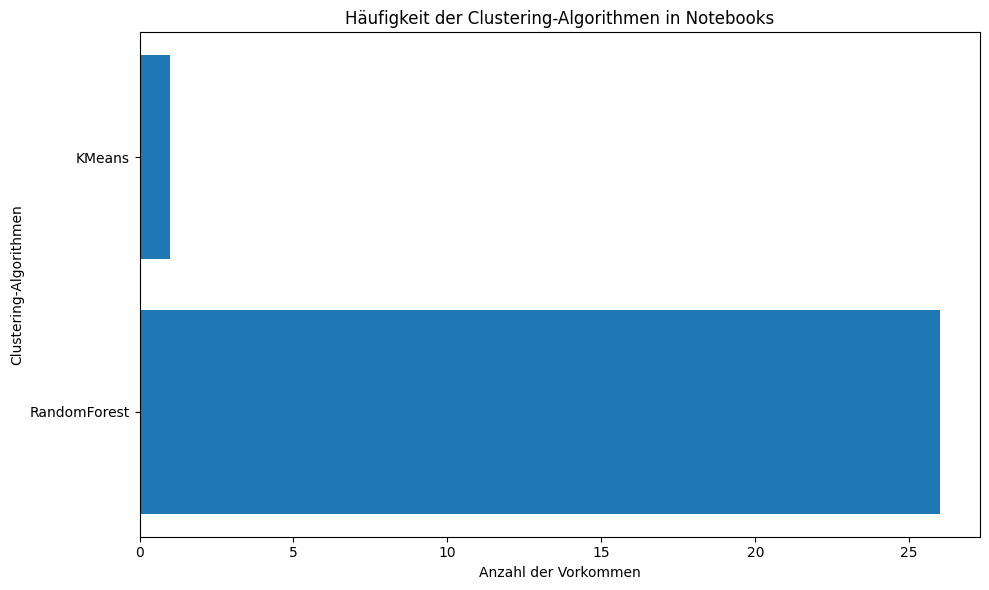

In [54]:
if __name__ == "__main__":
    # Ordnerpfad eingeben
    folder_path = "/Users/merluee/PycharmProjects/BigData/kaggle_notebooks/playground-series-s4e12"

    # Suche ausführen
    results = search_notebooks(folder_path)

    # Ergebnisse speichern
    save_results_to_csv(results)

    # Ergebnisse visualisieren
    if results:
        visualize_results(results)
    else:
        print("Keine Clustering-Algorithmen in den Notebooks gefunden.")